## Class 7: Piechart and Sunburst

In [1]:
import pandas as pd
import numpy as np

In [2]:
pip install xlrd

     |████████████████████████████████| 96 kB 4.3 MB/s             
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install openpyxl

     |████████████████████████████████| 242 kB 22.1 MB/s            
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install seaborn

     |████████████████████████████████| 292 kB 17.2 MB/s            
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install plotly

     |████████████████████████████████| 27.7 MB 9.1 kB/s             
Note: you may need to restart the kernel to use updated packages.


In [6]:
df = pd.read_excel('datasets/mic2.xlsx', engine = 'openpyxl')
df.head()

,Timestamp,Name,Age,Sex,Ocupation,Monthly income,Price,Quality,Quantity,Availability,...,Overal satisfaction,Consistency,Factor,Frowned,reason,Popular,My favorite,Kind,Preference,Recommend
0,2021-09-24 11:41:37.540,Jobish Vallikavungal Devassia,31 - 40,Male,Research,">40, 000",5,5,5,4,...,4,4,Taste,No,NaN,Combo_VLM,Chocolate,More than one flavoured,agree,agree
1,2021-09-24 11:44:42.933,chikku,21 - 30,Male,student,"<10,000",3,5,3,4,...,4,4,Taste,No,Quantity issues,Combo_VCS,Chocolate,More than one flavoured,neutral,neutral
2,2021-09-24 11:49:07.510,Dr Lillykutty Abraham,41 - 50,Female,Teaching,">40, 000",3,4,4,4,...,4,4,Taste,No,NaN,Combo_VCS,Caramel,More than one flavoured,disagree,neutral
3,2021-09-24 21:49:47.576,Joshua,21 - 30,Male,Student,"<10,000",5,5,3,4,...,4,4,Taste,No,NaN,Combo_VCS,Strawbery,More than one flavoured,agree,agree
4,2021-09-24 21:53:14.805,Aswathi,21 - 30,Female,Tutor,"10,000 - 20,000",5,5,4,4,...,5,5,Quality,No,NaN,Combo_VCS,Vanila,single flavoured,agree,Strongly agree


In [7]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px

In [8]:
mpl.style.use('ggplot')

In [9]:
counts = df['Age'].value_counts()

In [10]:
counts

21 - 30    37
<=20        6
31 - 40     4
41 - 50     3
Name: Age, dtype: int64

In [11]:
counts = counts.reindex(['<=20','21 - 30','31 - 40','41 - 50'])
counts

<=20        6
21 - 30    37
31 - 40     4
41 - 50     3
Name: Age, dtype: int64

In [12]:
counts = counts.to_frame()

In [13]:
#counts['%'] = ((counts.iloc[:,:]/counts.loc[:,'Age']).sum(axis = 0))#*100
x = counts.loc[:,'Age'].sum(axis = 0)
counts['%'] = (counts.iloc[:,:]/x)*100

In [14]:
counts

,Age,%
<=20,6,12.0
21 - 30,37,74.0
31 - 40,4,8.0
41 - 50,3,6.0


In [15]:
counts.columns

Index(['Age', '%'], dtype='object')

In [16]:
counts = counts.reset_index()
counts

,index,Age,%
0,<=20,6,12.0
1,21 - 30,37,74.0
2,31 - 40,4,8.0
3,41 - 50,3,6.0


In [17]:
counts = counts.rename({'index':'Age_group'},
                      axis = 1)
counts

,Age_group,Age,%
0,<=20,6,12.0
1,21 - 30,37,74.0
2,31 - 40,4,8.0
3,41 - 50,3,6.0


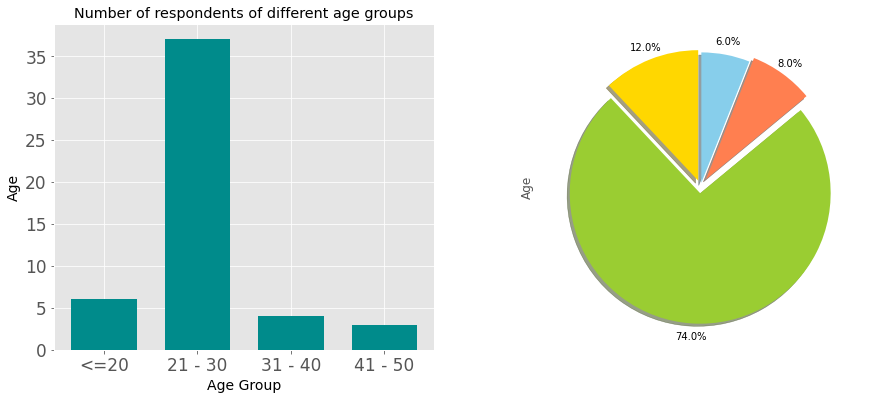

In [18]:
from seaborn.palettes import color_palette
x = list(counts['Age_group'])
y = list(counts['Age'])

plt.subplot(1,2,1)
plt.rcParams['figure.figsize'] = (15,7)

plt.bar(x, y,width = 0.7, color = 'darkcyan')
plt.xlabel('Age Group',
	 color = 'black', 
	fontsize = 14, 
	horizontalalignment = 'center')
plt.ylabel('Age',
	 fontweight = 'regular',
	 color = 'black', 
	fontsize = 14, 
	horizontalalignment = 'center')

plt.xticks(fontsize = 17)
plt.yticks(fontsize = 17)
plt.title('Number of respondents of different age groups')



plt.subplot(1,2,2)
explode_list = [0.05, 0.05, 0.07, 0.03]
color_list = ['gold', 'yellowgreen', 'coral', 'skyblue', 'pink','lightgreen']
counts['Age'].plot(kind = 'pie',
                  figsize = (15,6),
                  autopct = '%1.1f%%',
                  startangle = 90,
                  shadow = True,
                   labels = None,
                  pctdistance = 1.1,
                  explode = explode_list,
                  colors = color_list)
plt.show()